In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=2)

In [3]:
import random
def random_string(length,alphabet_list):
    rand_str = ''.join(random.choice(alphabet_list) for i in range(length))
    return rand_str

def perturb(seed,alphabet_list,p=0.5):
    seq=''
    for c in seed:
        if random.random() < p: c = random.choice(alphabet_list)
        seq += c
    return seq

def make_artificial_dataset(alphabet='ACGT', motives=None, motif_length=6, 
                            sequence_length=100, n_sequences=1000, n_motives=2, p=0.2,
                           random_state=1):
    random.seed(random_state)
    alphabet_list=[c for c in alphabet]
    
    if motives is None:
        motives=[]
        for i in range(n_motives):
            motives.append(random_string(motif_length,alphabet_list))
    else:
        motif_length = len(motives[0])
        n_motives = len(motives)
    
    sequence_length = sequence_length / len(motives)
    flanking_length = (sequence_length - motif_length ) / 2
    n_seq_per_motif = n_sequences

    counter=0
    seqs=[]
    for i in range(n_seq_per_motif):
        total_seq = ''
        total_binary_seq=''
        for j in range(n_motives):
            left_flanking = random_string(flanking_length,alphabet_list)
            right_flanking = random_string(flanking_length,alphabet_list)
            noisy_motif = perturb(motives[j],alphabet_list,p)
            seq = left_flanking + noisy_motif + right_flanking
            total_seq += seq
        seqs.append(('ID%d'%counter,total_seq))
        counter += 1
    binary_skeleton = '0' * flanking_length + '1' * motif_length + '0' * flanking_length
    binary_seq = binary_skeleton * n_motives
    return motives, seqs, binary_seq

In [4]:
from smod_wrapper import SMoDWrapper
from sklearn.cluster import KMeans

In [5]:
motives=None
motif_length=4
n_motives=1
sequence_length=8
n_sequences=10
perturbation_prob=0.05

complexity=5
min_score=4
min_freq=0.25
min_cluster_size=5
n_clusters=15
min_subarray_size=3
max_subarray_size=5
similarity_threshold=.9
freq_threshold=0.03

In [6]:
motives, pos_seqs, binary_seq = make_artificial_dataset(alphabet='ACGT',
                                                        motives=motives,
                                                        sequence_length=sequence_length,
                                                        n_sequences=n_sequences,
                                                        motif_length=motif_length,
                                                        n_motives=n_motives,
                                                        p=perturbation_prob)

In [7]:
from eden.modifier.seq import seq_to_seq, shuffle_modifier
neg_seqs = seq_to_seq(pos_seqs, modifier=shuffle_modifier, times=1, order=2)
neg_seqs = list(neg_seqs)

block_size=n_sequences/8

pos_size = len(pos_seqs)
train_pos_seqs = pos_seqs[:pos_size/2]
test_pos_seqs = pos_seqs[pos_size/2:]

neg_size = len(neg_seqs)
train_neg_seqs = neg_seqs[:neg_size/2]
test_neg_seqs = neg_seqs[neg_size/2:]

true_score = [float(int(i)) for i in binary_seq]

In [8]:
smod = SMoDWrapper(alphabet='dna',
                   scoring_criteria = 'pwm',
                   complexity = complexity,
                   n_clusters = n_clusters,
                   min_subarray_size = min_subarray_size,
                   max_subarray_size = max_subarray_size,
                   pos_block_size = block_size,
                   neg_block_size = block_size,
                   clusterer = KMeans(),
                   min_score = min_score,
                   min_freq = min_freq,
                   min_cluster_size = min_cluster_size,
                   similarity_th = similarity_threshold,
                   freq_th = freq_threshold)
smod.fit(pos_seqs, neg_seqs)

Setup 0.04 secs
Fitting
0 (1, 32769) (0.02 secs) (delta: 0.02)
1 (1, 32769) (0.02 secs) (delta: 0.00)
2 (1, 32769) (0.02 secs) (delta: 0.00)
3 (1, 32769) (0.02 secs) (delta: 0.00)
4 (1, 32769) (0.02 secs) (delta: 0.00)
5 (1, 32769) (0.03 secs) (delta: 0.00)
6 (1, 32769) (0.03 secs) (delta: 0.00)
7 (1, 32769) (0.03 secs) (delta: 0.00)
8 (1, 32769) (0.03 secs) (delta: 0.00)
9 (1, 32769) (0.03 secs) (delta: 0.00)
Setup 0.06 secs
Annotating
0 (0.00 secs) (delta: 0.00)
1 (0.02 secs) (delta: 0.02)
2 (0.02 secs) (delta: 0.00)
3 (0.02 secs) (delta: 0.00)
4 (0.03 secs) (delta: 0.00)
5 (0.03 secs) (delta: 0.00)
6 (0.03 secs) (delta: 0.00)
7 (0.03 secs) (delta: 0.00)
8 (0.03 secs) (delta: 0.00)
9 (0.03 secs) (delta: 0.00)
ECDF fit on 0 values
Optimal params: a:-4.00  b:1.00
Setup 0.07 secs
Annotating
0 (0.00 secs) (delta: 0.00)
1 (0.01 secs) (delta: 0.00)
2 (0.01 secs) (delta: 0.00)
3 (0.01 secs) (delta: 0.00)
4 (0.02 secs) (delta: 0.01)
5 (0.02 secs) (delta: 0.00)
6 (0.02 secs) (delta: 0.00)
7 (

Process PoolWorker-26:
Process PoolWorker-30:
Process PoolWorker-31:
Process PoolWorker-29:
Process PoolWorker-28:
Process PoolWorker-32:
Process PoolWorker-25:
Process PoolWorker-27:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/zr/anaconda2/envs/hiwi/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/zr/anaconda2/envs/hiwi/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/zr/anaconda2/envs/hiwi/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/zr/anaconda2/envs/hiwi/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/zr/anaconda2/envs/hiwi/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/home/zr

KeyboardInterrupt: 

In [ ]:
def score_seqs(seqs, n_motives, tool):
    scores = []
    for j in range(len(seqs)):
        seq_scr = []
        iters = tool.nmotifs
        for k in range(iters):
            scr=tool.score(motif_num=k+1, seq=seqs[j][1])
            seq_scr.append(scr)

        # taking average over all motives for a sequence

        x = np.array(seq_scr[0])
        for l in range(1, iters):
            x = np.vstack((x, seq_scr[l]))
        seq_scr = list(np.mean(x, axis=0))
        scores.append(seq_scr)
    return scores

In [ ]:
scores = score_seqs(seqs=test_pos_seqs,
                    n_motives=n_motives,
                    tool=smod)

In [54]:
for i in scores: 
    print i
    print

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [51]:
len(scores)

50

In [28]:
from sklearn.metrics import roc_auc_score

roc_scores = []
for score in scores:
    roc_scores.append(roc_auc_score(true_score, score))
avg_roc = np.average(roc_scores)
std_roc = np.std(roc_scores)



In [29]:
avg_roc

0.54533593749999998

In [19]:
std_roc

0.0

In [55]:
% matplotlib inline
import pylab as plt 

In [ ]:
plt.plot(range(1,len(scores[0])+1), scores[0])
plt.show()

In [ ]:
plt.bar(range(1,len(scores[0])+1), scores[0])
plt.show()

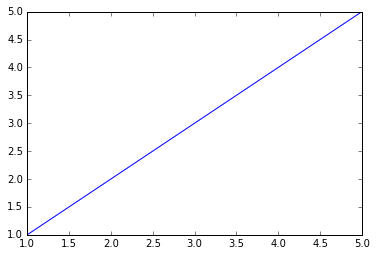

In [59]:
plt.plot([1,2,3,4,5],[1,2,3,4,5])

In [73]:
len(true_score)

52

In [79]:
print len(scores)

2


In [80]:
print scores[1]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [81]:
print scores[0]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.